<a href="https://colab.research.google.com/github/Arghadipkuri003/GenAi_pract./blob/main/4_Basic_generative_AI_model_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1: Importing Libraries

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Step 2: Creating Dummy Dataset (Simple Real Images)

In [2]:
# Creating simple real images
def generate_real_images(batch_size):
    return tf.random.normal([batch_size, 28, 28])

# Step 3: Initializing Parameters

In [3]:
noise_dim = 100
image_dim = 28 * 28
hidden_dim = 128

# Generator weights
G_W1 = tf.Variable(tf.random.normal([noise_dim, hidden_dim]))
G_b1 = tf.Variable(tf.zeros([hidden_dim]))

G_W2 = tf.Variable(tf.random.normal([hidden_dim, image_dim]))
G_b2 = tf.Variable(tf.zeros([image_dim]))

# Discriminator weights
D_W1 = tf.Variable(tf.random.normal([image_dim, hidden_dim]))
D_b1 = tf.Variable(tf.zeros([hidden_dim]))

D_W2 = tf.Variable(tf.random.normal([hidden_dim, 1]))
D_b2 = tf.Variable(tf.zeros([1]))

# Step 4: Defining Generator & Discriminator

In [4]:
def generator(z):
    h1 = tf.nn.relu(tf.matmul(z, G_W1) + G_b1)
    output = tf.nn.tanh(tf.matmul(h1, G_W2) + G_b2)
    return output

def discriminator(x):
    h1 = tf.nn.relu(tf.matmul(x, D_W1) + D_b1)
    logits = tf.matmul(h1, D_W2) + D_b2
    return tf.nn.sigmoid(logits)

# Step 5: Defining Loss Functions

In [5]:
def discriminator_loss(real_output, fake_output):
    real_loss = -tf.reduce_mean(tf.math.log(real_output + 1e-8))
    fake_loss = -tf.reduce_mean(tf.math.log(1 - fake_output + 1e-8))
    return real_loss + fake_loss

def generator_loss(fake_output):
    return -tf.reduce_mean(tf.math.log(fake_output + 1e-8))

# Step 6: Training Loop (Using tf.GradientTape)

In [6]:
learning_rate = 0.001
epochs = 2000
batch_size = 64

for epoch in range(epochs):

    # Generating real images
    real_images = generate_real_images(batch_size)
    real_images = tf.reshape(real_images, [batch_size, -1])

    # Generating noise
    noise = tf.random.normal([batch_size, noise_dim])

    with tf.GradientTape(persistent=True) as tape:

        # Generating fake images
        fake_images = generator(noise)

        # Discriminator outputs
        real_output = discriminator(real_images)
        fake_output = discriminator(fake_images)

        # Computing losses
        d_loss = discriminator_loss(real_output, fake_output)
        g_loss = generator_loss(fake_output)

    # Computing gradients
    d_gradients = tape.gradient(d_loss, [D_W1, D_b1, D_W2, D_b2])
    g_gradients = tape.gradient(g_loss, [G_W1, G_b1, G_W2, G_b2])

    # Updating weights
    for var, grad in zip([D_W1, D_b1, D_W2, D_b2], d_gradients):
        var.assign_sub(learning_rate * grad)

    for var, grad in zip([G_W1, G_b1, G_W2, G_b2], g_gradients):
        var.assign_sub(learning_rate * grad)

    if epoch % 200 == 0:
        print(f"Epoch {epoch} | D Loss: {d_loss.numpy():.4f} | G Loss: {g_loss.numpy():.4f}")

Epoch 0 | D Loss: 20.3448 | G Loss: 4.5603
Epoch 200 | D Loss: 20.6863 | G Loss: 4.7477
Epoch 400 | D Loss: 18.2373 | G Loss: 5.6251
Epoch 600 | D Loss: 15.7827 | G Loss: 6.8385
Epoch 800 | D Loss: 13.6393 | G Loss: 10.1438
Epoch 1000 | D Loss: 12.9679 | G Loss: 9.7658
Epoch 1200 | D Loss: 9.3663 | G Loss: 11.8286
Epoch 1400 | D Loss: 8.8225 | G Loss: 14.3136
Epoch 1600 | D Loss: 8.9588 | G Loss: 14.0498
Epoch 1800 | D Loss: 10.0337 | G Loss: 11.9096


# Step 7: Generating and Display Image

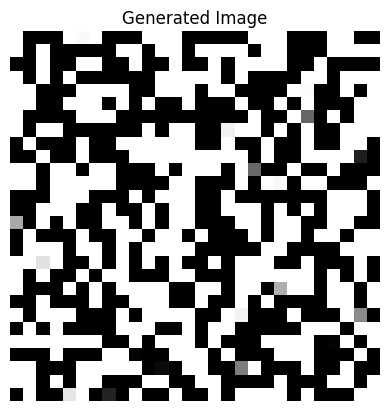

In [7]:
# Generating one sample
noise = tf.random.normal([1, noise_dim])
generated_image = generator(noise)

# Reshaping and plotting
image = tf.reshape(generated_image, [28, 28])

plt.imshow(image, cmap='gray')
plt.title("Generated Image")
plt.axis('off')
plt.show()